In [1]:
'''Does income affect attitudes towards the environment or the poor?  
Is this influence modulated by political affiliations?'''


'Does income affect attitudes towards the environment or the poor?  \nIs this influence modulated by political affiliations?'

In [25]:
import sys
sys.path.append("C:/Users/Maisha/Dropbox/MB_dev/Python/python_gss")

from csv_to_dataframe import *
import numpy as np

%matplotlib inline

dataf = get_gss()

In [26]:
'''Make a scatter plot of (natenvir) and income (realinc) ?  Is there a relationship?  
Color the points based on party affiliation.  Is there a pattern?'''

'Make a scatter plot of (natenvir) and income (realinc) ?  Is there a relationship?  \nColor the points based on party affiliation.  Is there a pattern?'

In [111]:
'''0 means no income data'''
sql = 'realinc==0 and year==2016'
print(dataf.columns)
noanswers = dataf.query(sql)
len(noanswers)

Index(['ballot', 'chldidel', 'kidssol', 'parsol', 'wksubs', 'wksub', 'satjob',
       'workhard', 'thnkself', 'confed', 'coneduc', 'confinan', 'hapmar',
       'happy', 'bible', 'spanking', 'letdie1', 'fear', 'zodiac', 'dwelown',
       'realrinc', 'realinc', 'partners', 'marhomo', 'letin', 'discaff',
       'marblk', 'helpnot', 'helppoor', 'fefam', 'tvhours', 'news', 'relig16',
       'pray', 'speduc', 'maeduc', 'paeduc', 'educ', 'agekdbrn', 'age',
       'childs', 'sibs', 'spwrksta', 'marital', 'hrs2', 'hrs1', 'wrkstat',
       'id_', 'sex', 'race', 'res16', 'relig', 'grass', 'gunlaw', 'cappun',
       'tax', 'eqwlth', 'nateduc', 'natdrug', 'natcrime', 'natenvir',
       'polviews', 'partyid', 'born', 'reg16', 'year'],
      dtype='object')


271

In [28]:
one_col = dataf['realinc']
col_of_bools = onecol > 0
all_inc = dataf[col_of_bools]

avg_inc = sum(all_inc['realinc'])/len(all_inc['realinc'])

# standard dev
sd = np.std(all_inc['realinc'])
print("Average income = {}, standard dev = {}".format(avg_inc, sd))

Average income = 33375.698372252205, standard dev = 32738.56481439454


In [29]:
all_envir = dataf.query('natenvir>0 and natenvir<4')
avg_envir = sum(all_envir['natenvir'])/len(all_envir['natenvir'])
sd = np.std(all_envir['natenvir'])
print("Average opinion envir spending = {}, standard dev = {}".format(avg_envir, sd))

Average opinion envir spending = 1.4657678395264715, standard dev = 0.6492568873611464


In [46]:
def get_envir_data(yr):
    all_envir = dataf.query('natenvir>0 and natenvir<4 and year=={}'.format(yr))
    if len(all_envir['natenvir']) == 0:
        return [-1, -1]
    avg_envir = sum(all_envir['natenvir'])/len(all_envir['natenvir'])
    sd = np.std(all_envir['natenvir'])
    return [avg_envir, sd]

In [123]:
def get_inc_data(yr):
    all_inc = dataf.query('realinc>0 and year=={}'.format(yr))
    if len(all_inc['realinc']) == 0:
        return [-1, -1]
    avg_inc = sum(all_inc['realinc'])/len(all_inc['realinc'])
    sd = np.std(all_inc['realinc'])
    return [avg_inc, sd]

In [132]:
# empty array
ee = np.empty((1,3), int)
print(ee[0][0])

ee = np.empty((0,3), int)
# print(ee[0][0])
#np.append(ee, [[1,2,3],[4,5,6],[7,8,9]], axis=1)
ee2 = np.append(ee, [[1,2,3],[4,5,6]], axis=0)
print("ee="+str(ee))
print("ee2="+str(ee2))

ee3 = np.append(ee2, [[44,55],[66,77]], axis=1)
print("ee2="+str(ee3))

0
ee=[]
ee2=[[1 2 3]
 [4 5 6]]
ee2=[[ 1  2  3 44 55]
 [ 4  5  6 66 77]]


In [133]:
all_data = np.empty((0,3), int)
for i in range(1994, 2017, 2):
    all_data = np.append(all_data, [[i, get_envir_data(i)[0], get_inc_data(i)[0]]], axis=0)

In [134]:
all_data

array([[  1.99400000e+03,   1.47903780e+00,   3.11355641e+04],
       [  1.99600000e+03,   1.50398840e+00,   3.19911859e+04],
       [  1.99800000e+03,   1.45371775e+00,   3.05581655e+04],
       [  2.00000000e+03,   1.44944649e+00,   3.32270468e+04],
       [  2.00200000e+03,   1.46822995e+00,   3.53996817e+04],
       [  2.00400000e+03,   1.43685756e+00,   3.78814804e+04],
       [  2.00600000e+03,   1.37551867e+00,   3.37506854e+04],
       [  2.00800000e+03,   1.40778689e+00,   3.49973128e+04],
       [  2.01000000e+03,   1.55430328e+00,   3.08133147e+04],
       [  2.01200000e+03,   1.53347065e+00,   3.42947475e+04],
       [  2.01400000e+03,   1.50803859e+00,   3.39653847e+04],
       [  2.01600000e+03,   1.45467523e+00,   3.26101650e+04]])

In [140]:
print(rd['partyid'].head(10))

def not_rd(x):
    if x != 0 and x != 1 and x != 5 and x != 6:
        return 999
    else: return x
    
print(rd['partyid'].apply(not_rd).head(10))

3     1
4     0
5     7
6     0
9     1
11    1
15    0
16    0
19    0
21    0
Name: partyid, dtype: int64
3       1
4       0
5     999
6       0
9       1
11      1
15      0
16      0
19      0
21      0
Name: partyid, dtype: int64


In [141]:
colors = {'0':'blue', '1':'blue', '5':'red', '6':'red', '999': 'yellow'}
    
rd = dataf.query('realinc>0 and 0<natenvir<4 and year=={}'.format(1994))

rd_color = rd['partyid'].apply(not_rd).apply(lambda x : colors[str(x)])

print(rd_color.head(10))

3       blue
4       blue
5     yellow
6       blue
9       blue
11      blue
15      blue
16      blue
19      blue
21      blue
Name: partyid, dtype: object


In [101]:
def make_plot(yr):
    dfcs = dataf.query('realinc>0 and 0<natenvir<4 and year=={}'.format(yr))
    dfcsnoisy = dfcs + np.random.uniform(-0.1, 0.1, (dfcs.shape))
    the_plot = dfcsnoisy.plot(kind='scatter', x='natenvir', y='realinc', figsize=(10,10), c=rd_color)
    return the_plot

Axes(0.125,0.125;0.775x0.755) Axes(0.125,0.125;0.775x0.755)


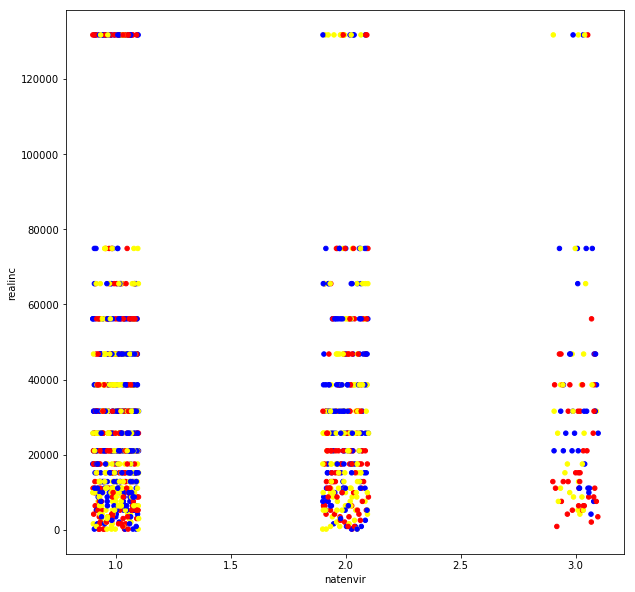

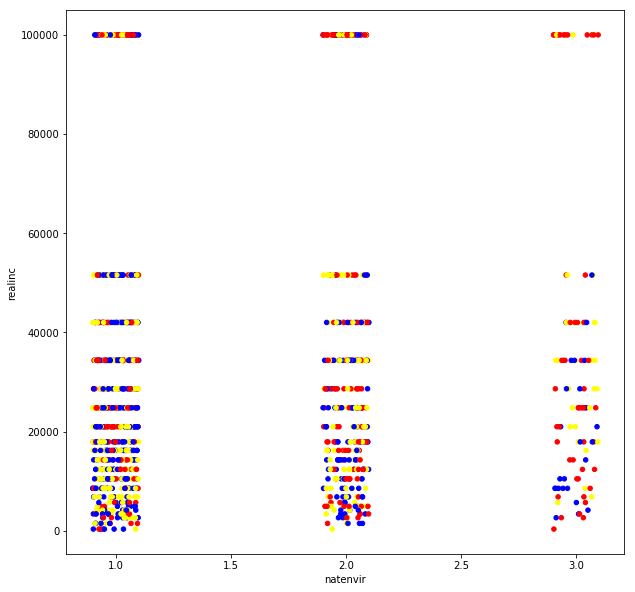

In [102]:
yr16 = make_plot(2016)
yr94 = make_plot(1994)

print(yr94, yr16)

In [162]:
# Given a year and envir_num attitude, return the median income
def calc_med_inc(yr, envir_num):
    data_query = 'realinc>0 and natenvir=={} and year=={}'.format(envir_num, yr)
    the_data = dataf.query(data_query)
    if len(the_data) == 0:
        return -1
    data_sorted = the_data.sort_values('realinc')
    l = len(data_sorted)//2
    med_row = data_sorted.iloc[l,:]
    return med_row['realinc']

In [163]:
calc_med_inc(2015, 1)

-1

In [192]:
inc_yr_env = pd.DataFrame(columns=['realinc', 'year', 'natenvir'])
inc_yr_env['realinc'] = dataf['realinc']
inc_yr_env['year'] = dataf['year']
inc_yr_env['natenvir'] = dataf['natenvir']
iye = inc_yr_env.query('realinc>0 and 0<natenvir<4')

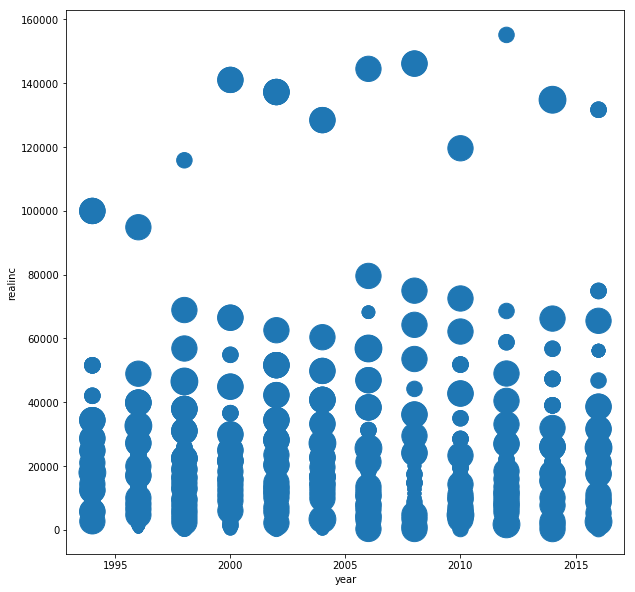

In [194]:
inc_yr_env_plot = iye.plot(kind='scatter', x='year', y='realinc', figsize=(10,10), s=inc_yr_env.natenvir*80) #, c=rd_color)